In [1]:
#!pip install labelme tensorflow tensorflow-gpu opencv-python matplotlib albumentations

  Using cached opencv_python-4.9.0.80-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
Using cached opencv_python-4.9.0.80-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (62.2 MB)


In [1]:
import os #to easier navigate in files
import time #keep tracking on movements
import uuid #create uniform uniqe identifier for images
import cv2

  Using cached tensorflow-2.15.0.post1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.2 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.5.4-py3-none-any.whl (19 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached h5py-3.10.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.5 kB)
  Using cached libclang-16.0.6-py2.py3-none-manylinux2010_x86_64.whl.metadata (5.2 kB)
  Using cached ml_dtypes-0.2.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached protobuf-4.25.2-cp37-abi3-manylinux2014_x86_64.whl.metadata (541 bytes)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached typing_extensions-4.9.0-py3-none-any.whl.metadata

2024-02-02 14:58:39.315753: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-02 14:58:39.372822: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-02 14:58:39.372860: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-02 14:58:39.374041: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-02 14:58:39.380486: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-02 14:58:39.381140: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [6]:
IMAGE_PATH = os.path.join('data', 'images')
number_of_images = 30

In [11]:
capture = cv2.VideoCapture(0) #stablish connection to the camera, the camera number may be different depends in the device
for image in range(number_of_images):#iterate trough images
    print(f'Collecting image {image}') #print each image in images
    return_value, frame = capture.read() #read from capture device that did it even capture something and the frames
    image_name = os.path.join(IMAGE_PATH, f'{str(uuid.uuid1())}.jpg') #define the name of the file of the image with unique name
    cv2.imwrite(image_name, frame) #save the frame into the file
    cv2.imshow('frame', frame) #display it
    time.sleep(1) #apply delay

    #easly breake the loop by press q
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

capture.release()
cv2.destroyAllWindows()

In [12]:
!labelme #open label me and labeling face on the images 

fish: Unknown command: labelme
fish: 
labelme #open label me
^~~~~~^


In [8]:
#!pipenv install matplotlib numpy
import tensorflow as tf
import numpy as np #to data preproccessing
import cv2
import json
from matplotlib import pyplot as plt #to visualize images

In [9]:
#limit gpu memory growth to avoid OutOfMemory error by setting GPU Memory Cons Growth and check GPU availablity
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    print("GPUs are available.")
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)
else:
    print("GPUs are not available.TensorFlow will automatically use the CPU.")

GPUs are not available.TensorFlow will automatically use the CPU.


In [22]:
#load image to tensorflow data pipeline
images = tf.data.Dataset.list_files('data/images/*.jpg', shuffle=False)
#load image
def load_image(file_path):
    byte_encoded_image = tf.io.read_file(file_path)
    image = tf.io.decode_jpeg(byte_encoded_image)
    return image

In [23]:
images = images.map(load_image) #apply load_image func to each element of dataset(images)
images.as_numpy_iterator().next()
type(images) # check that is tensorflow data pipeline
image_generator = images.batch(4).as_numpy_iterator() #return the number values inside the batch
plot_image = image_generator.next()

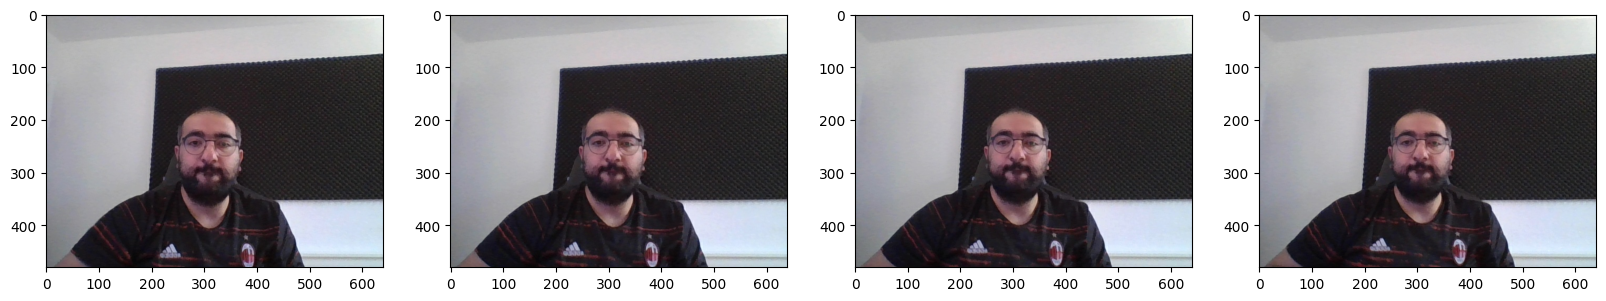

In [27]:
fig, ax =plt.subplots(ncols=4, figsize = (20, 20))
for idx , image in enumerate(plot_image):
    ax[idx].imshow(image)
plt.show()